In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def conv(s):
    idx = -1
    for i,c in enumerate(s):
        if c!='.' and not c.isnumeric():
            idx = i
            break
#     print(s[idx])
    unit = s[idx:]
    num = float(s[:idx])
    if unit =='s':
        num=num*1000

    return num

def pt_values(yvals,ax,**kwargs):
    N = len(yvals)
    X2 = np.sort(yvals)
    F2 = np.array(np.arange(N))/float(N)
    
    s = kwargs.pop('start',0)
    e = kwargs.pop('end',1)
    
    start=int(len(F2)*s)
    end=int(len(F2)*e)
    
    xvals = X2[start:end]
    yvals = F2[start:end]
    ax.plot(xvals,yvals,**kwargs)
    
def pt(fn, ax, **kwargs):
    df = pd.read_csv(fn, header=None)
    df['float_lat'] = df[0].apply(conv)
    yvals = df['float_lat'].to_numpy()
    pt_values(yvals, ax, **kwargs)

    
    
def get_box(fn, **kwargs):
    df = pd.read_csv(fn, header=None)
    df['float_lat'] = df[0].apply(conv)
    return df['float_lat']

    

In [ ]:
fig, ax = plt.subplots()
hosts = ['clabsvr','clabcl0','clabcl1','clabcl2']

# boxes = []
# for i,ax in enumerate(axs.flat):
#     box = get_box(f'../feodata/clab-178922/run_load/federated/{hosts[i]}/2.out')
#     boxes.append(box)
# ax.boxplot(boxes)

boxes = []
for i,_ in enumerate(hosts):
    box = get_box(f'../feodata/clab-178922/run_load/roundrobin/{hosts[i]}/2.out')
    boxes.append(box)
ax.boxplot(boxes, positions=np.arange(4), showfliers=False)

boxes = []
for i,_ in enumerate(hosts):
    box = get_box(f'../feodata/clab-178922/run_load/federated/{hosts[i]}/2.out')
    boxes.append(box)
ax.boxplot(boxes, positions=np.arange(4)+0.5, showfliers=False)

In [ ]:
fig, axs = plt.subplots(2,2, sharex=True)
hosts = ['clabsvr','clabcl0','clabcl1','clabcl2']

for i,ax in enumerate(axs.flat):
    ax.set_title(i)
    pt(f'../feodata/clab-181357/run_load/federated/{hosts[i]}/profile8-p2p20ms.out',ax,linestyle='dotted')
for i,ax in enumerate(axs.flat):
    pt(f'../feodata/clab-181357/run_load/roundrobin/{hosts[i]}/profile8-p2p20ms.out',ax)
    
    


In [ ]:
fig, ax = plt.subplots()
# pols = ['base','roundrobin','federated','central','hybrid','epoch']
pols = ['roundrobin','federated']
hosts = [f'az{i}' for i in range(4)]
hosts = ['clabsvr','clabcl0','clabcl1','clabcl2']

for pol in pols:
    total = []
    for i,_ in enumerate(hosts):
#       box = get_box(f'../feodata/az-exp1/run_load/{pol}/{hosts[i]}/profile5-az-p2p20ms.out')
        box = get_box(f'../feodata/clab-181357/run_load/{pol}/{hosts[i]}/profile5-hotspot-test.out')
        total = np.concatenate((total,box))
    pt_values(total, ax)

# pols[0]='local-no-offload'
ax.legend(pols)
ax.set_ylabel('fraction of requests \n(across all nodes)')
ax.set_xlabel('latency(ms)')
ax.axvline(x=200, color='black')
# ax.set_ylim(0.90,1)

In [ ]:
import numpy as np
import json

def visualize_rate(filename, ax, **kwargs):
    s1 = np.load(filename)
    df1 = pd.DataFrame()
    df1[0] = pd.to_datetime(s1.cumsum(), unit='s')
    df1 = df1.set_index(0)
    df1[1] = np.ones(len(df1))
    df1[1].rolling('1s').count().plot(ax=ax, **kwargs)

fig,ax = plt.subplots()

# visualize_rate('../loadgen/var_lam_loads_2rps/site1/traffic_dur1000_lam0.2_stime10_rate2.0_site1.npy', ax)
# visualize_rate('../loadgen/var_lam_loads_2rps/site2/traffic_dur1000_lam0.6_stime10_rate2.0_site2.npy',ax)
# visualize_rate('../loadgen/var_lam_loads_2rps/site3/traffic_dur1000_lam0.6_stime10_rate2.0_site3.npy',ax)
# visualize_rate('../loadgen/var_lam_loads_2rps/site4/traffic_dur1000_lam0.6_stime10_rate2.0_site4.npy',ax)
# visualize_rate('../loadgen/traffic_dur1000_lam0.6_stime10_rate2.0_site1.npy',ax)
# visualize_rate('../loadgen/traffic_dur1000_lam0.5_stime10_rate2.0_site1.npy',ax)

# visualize_rate('../loadgen/lam_varies/traffic_dur1000_lam0.5-1.0_stime10_rate2.0_site1.npy',ax)
# visualize_rate('../loadgen/lam_varies/traffic_dur1000_lam1.0-0.5_stime10_rate2.0_site1.npy', ax)

# visualize_rate('../loadgen/lam_varies_2/traffic_dur2000_lam0.25_stime10.0_rate1.0_site1.npy', ax)
# visualize_rate('../loadgen/lam_varies_2/traffic_dur2000_lam0.5-0.25_stime10.0_rate1.0_site2.npy', ax)
# visualize_rate('../loadgen/lam_varies_2/traffic_dur2000_lam0.5-0.25_stime10.0_rate1.0_site1.npy', ax)


# visualize_rate('../faas-sim/examples/multi_site_reqs/loads/traffic_dur1000_lam0.2_stime10.0_rate1.0_site1.npy', ax)
visualize_rate('../faas-sim/examples/multi_site_reqs/loads/traffic_dur1000_lam0.2_stime10.0_rate1.0_site2.npy', ax)
visualize_rate('../faas-sim/examples/multi_site_reqs/loads/traffic_dur1000_lam0.2_stime10.0_rate1.0_site3.npy', ax)

# visualize_rate('../loadgen/traffic_dur1000_lam0.4_stime10_rate2.0_site1.npy',ax)

In [ ]:
fig,axs = plt.subplots(4,3, figsize=(9,6), sharey=True)
from matplotlib.dates import DateFormatter
formatter = DateFormatter('%H:%M')

for i,ax in enumerate(axs.flat):
    ax.xaxis.set_major_formatter(formatter)
    visualize_rate(f'../loadgen/sfcabs-load-site{i}.npy',ax)
    ax.set_title(f'Site {i}')
    ax.set_xlabel(' ')

    
fig.tight_layout()

In [ ]:

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'xtick.labelsize': 12})

# fig,axs = plt.subplots(3,1, sharex=True, figsize=(3,8))
fig, ax = plt.subplots()

from matplotlib.dates import DateFormatter
formatter = DateFormatter('%H:%M')
for i in []:
#     ax.xaxis.set_major_formatter(formatter)
    visualize_rate(f'../loadgen/sfcabs-12-node-load/sfcabs-load-site{9+i}.npy',ax)
    ax.set_xlabel('')
#     ax.set_title(f'Edge Cluster {i+1}')

fig.tight_layout()
ax.legend(['1','2','3'], title='Edge Site')
ax.set_ylabel('QPS', fontsize=18)
ax.set_xlabel('Time(mm:ss)', fontsize=18)
fig.savefig('/Users/anirudh/Workspace/fededge/paper/figs/varloads.pdf', bbox_inches='tight')


In [ ]:
df = pd.read_csv('../feodata/clab-178922/test/filtered-clabsvr', sep='|',header=None)
# df['qlen']=df['json'].apply(lambda x: json.loads(x))
df['qlen'] = df[1].apply(lambda x : json.loads(x)['qlen'])

In [ ]:
fig,ax = plt.subplots(1,2) 
df.groupby(0)['qlen'].plot(ax=ax[0], legend=True)


df = pd.read_csv('../feodata/clab-178922/test/filtered-clabcl2', sep='|',header=None)
# df['qlen']=df['json'].apply(lambda x: json.loads(x))
df['qlen'] = df[1].apply(lambda x : json.loads(x)['qlen'])
df.groupby(0)['qlen'].plot(ax=ax[1], legend=True)


In [ ]:
def plot_real(fn, ax):
    df = pd.read_csv(fn, header=None, sep=' ')
    df['e2e'] = df[0].apply(conv)
    df['it'] = df[1].astype('float')
#     df['e2e'].plot(ax=ax)
    df['it'].plot(ax=ax)
    ax.legend(['Invoke Time'])
    
fig,axs = plt.subplots(1,4,sharey=True, figsize=(14,4))
for i,ax in enumerate(axs.flat):
    plot_real(f'../feodata/clab-181357/qps{2+i}_1.out',ax) 
    ax.set_title(f'{2+i} QPS')

In [ ]:
fig,ax = plt.subplots()
plot_real(f'../feodata/clab-181357/qps6_1.out',ax) 
ax.set_title('6 QPS')

In [ ]:
fig,axs = plt.subplots(1,3, figsize=(9,4))
boxes = []
ax = axs[0]
df = pd.read_csv('../feodata/clab-181357/bare1.out', header=None)
df['it'] = df[0].astype('float')
df['it'].plot(ax=ax)
boxes.append(df['it'])
ax.set_title('clab VM')

ax = axs[1]
df = pd.read_csv('../feodata/clab-181357/bare2.out', header=None)
df['it'] = df[0].astype('float')
df['it'].plot(ax=ax)
boxes.append(df['it'])
ax.set_title('clab Bare')


ax = axs[2]
df = pd.read_csv('../feodata/clab-181357/azurebare.out', header=None)
df['it'] = df[0].astype('float')
df['it'].plot(ax=ax)
boxes.append(df['it'])
ax.set_title('Azure VM')





In [ ]:
fig,ax = plt.subplots()
ax.boxplot(boxes)
ax.set_xticklabels(['clab VM','clab Bare','Azure VM'])

In [ ]:
qpses = range(11,17)

boxes = []
fig,ax = plt.subplots()

for qps in qpses:
    df = pd.read_csv(f'../feodata/az-exp1/{qps}.out', header=None)
    df['ts'] = df[0].apply(conv)

    pt_values(df['ts'],ax)
    boxes.append(df['ts'].values)

# pt = ax.boxplot(boxes)
# ax.set_yscale('log')
ax.set_ylim(0.90,1)
ax.legend(qpses)

In [ ]:
path='../feodata/drone/test1/'

def get_arr(path):
    files = os.listdir(path)
    final_arr = np.array([])
    for file in files:
        if 'lats' not in file:
            continue
        fn = f'{path}{file}'
        try:
            df = pd.read_csv(fn, header=None)
            final_arr = np.hstack((final_arr, df[0].values))
        except:
            continue
            
        
    return final_arr


def conv(x):
    valstr = x.strip()
    if valstr.endswith('ms'):
        val = float(valstr[:-2])
    elif valstr.endswith('s'):
        val = 1000*float(valstr[:-1])

    return val

    
def get_feo_arr(path):
    files = os.listdir(path)
    final_arr = np.array([])
    for file in files:
        if 'lats' not in file:
            continue
        fn = f'{path}{file}'
        try: 
            df = pd.read_csv(fn, header=None)
            df[2] = df[1].apply(conv)
            final_arr = np.hstack((final_arr, df[2].values))
        except:
            continue
            
        
    return final_arr
    


In [ ]:
fa1 = get_arr('../feodata/lat10/drone/roundrobin/site1/drone_results/')
fa2 = get_arr('../feodata/lat10/drone/roundrobin/site10/drone_results/')
fa3 = get_arr('../feodata/lat10/drone/roundrobin/site11/drone_results/')

rr = np.hstack((fa1,fa2,fa3))

fig, ax = plt.subplots()
pt_values(rr,ax)


fa1 = get_arr('../feodata/lat10/drone/federated/site1/drone_results/')
fa2 = get_arr('../feodata/lat10/drone/federated/site10/drone_results/')
fa3 = get_arr('../feodata/lat10/drone/federated/site11/drone_results/')
fed = np.hstack((fa1,fa2,fa3))
pt_values(fed,ax)
ax.set_ylim(0.90,1.0)
ax.axvline(x=120)

In [ ]:
fig, ax = plt.subplots()
sites = range(12)
# sites = [9]
bp = []
fp = []
arrs = []
for i in sites:
    arr = get_arr(f'../feodata/drone/debug/diffc-2c-test//base/site{i}/drone_results/')
    arrs.append(arr)
    bp.append(np.percentile(arr, 99))

base = np.hstack(arrs)
pt_values(base, ax)

arrs = []
for i in sites:
    arr = get_arr(f'../feodata/drone/debug/diffc-2c-test//federated/site{i}/drone_results/')
    arrs.append(arr)
    fp.append(np.percentile(arr, 99))
fed = np.hstack(arrs)
pt_values(fed, ax)

arrs = []
for i in sites:
    arr = get_arr(f'../feodata/drone/debug/diffc-2c-test//roundrobin/site{i}/drone_results/')
    arrs.append(arr)
rr = np.hstack(arrs)
pt_values(rr, ax)

arrs = []
for i in sites:
    arr = get_arr(f'../feodata/drone/debug/diffc-2c-test//roundrobinlatency/site{i}/drone_results/')
    arrs.append(arr)
rt = np.hstack(arrs)
pt_values(rt, ax)

arrs = []
for i in sites:
    arr = get_arr(f'../feodata/drone/debug/diffc-2c-test//epoch/site{i}/drone_results/')
    arrs.append(arr)
epoch = np.hstack(arrs)
pt_values(epoch, ax)

# arr = get_arr(f'../feodata/drone/debug/2site-0ms/base/')
# # pt_values(arr, ax)
# arr = get_arr(f'../feodata/drone/debug/2site-0ms/base-high-5c/')
# print(np.percentile(arr,50))
# print(np.percentile(arr,99))
# pt_values(arr, ax)

# arr = get_arr(f'../feodata/drone/debug/2site-5ms/base-low-1c/')
# pt_values(arr, ax)
# arr = get_arr(f'../feodata/drone/debug/2site-0ms/base-high-1c/')
# pt_values(arr, ax)
# arr = get_arr(f'../feodata/drone/debug/2site-0ms/base-auto/res2/')
# pt_values(arr, ax)
# arr = get_arr(f'../feodata/drone/debug/2site-0ms/base-auto/res3/')
# pt_values(arr, ax)
# arr = get_arr(f'../feodata/drone/debug/2site-0ms/base-auto/res4/')
# pt_values(arr, ax)
# arr = get_arr(f'../feodata/drone/debug/2site-0ms/base-auto/res5/')
# pt_values(arr, ax)
# # arr = get_arr(f'../feodata/drone/debug/2site-0ms/fed-high-1c//')
# # pt_values(arr, ax)
# arr = get_arr(f'../feodata/drone/debug/2site-0ms/fed-high-1c-q2-oc5/')
# pt_values(arr, ax)
# arr = get_arr(f'../feodata/drone/debug/2site-0ms/fed-high-2c-q2-oc5/')
# pt_values(arr, ax, linestyle="solid")
# arr = get_arr(f'../feodata/drone/debug/2site-0ms/fed-high-2c-q2-oc10/')
# pt_values(arr, ax, linestyle="dashed")
# arr = get_arr(f'../feodata/drone/debug/2site-0ms/fed-high-2c-q4-oc10/')
# pt_values(arr, ax, linestyle=":")
# print(np.percentile(arr,50))
# print(np.percentile(arr,99))
# arr = get_arr(f'../feodata/drone/debug/2site-0ms/rr-high-2c-oc10/')
# pt_values(arr, ax)
# print(np.percentile(arr,50))
# print(np.percentile(arr,99))


ax.axhline(0.99, color='black', linestyle=':')
ax.axhline(0.50, color='black', linestyle=':')
ax.axvline(100, color='black', linestyle=':')





ax.grid()

# arrs = []
# for i in sites:
#     arr = get_arr(f'../feodata/drone/lat10/epoch/site{i}/drone_results/')
#     arrs.append(arr)
# epoch = np.hstack(arrs)
# pt_values(epoch, ax)
# ax.set_xlim(0,160)
# ax.set_ylim(0.99,1)
ax.set_xlim(0,250)
# ax.legend([5,'fed-2c-q2-oc5','fed-2c-q2-oc10','fed-2c-q4-oc10','rr-2c-oc10'])
ax.legend(['No Offload','FED','RR','RT','EB'])

In [ ]:
100*(np.array(bp)-np.array(fp))/np.array(bp)

In [ ]:
100*(np.percentile(base, 99) - np.percentile(fed, 99))/np.percentile(base, 99)

 

In [ ]:
arr = get_arr('../feodata/drone/debug/feo-invoke/4_1c/')
arr2 = get_arr('../feodata/drone/debug/feo-invoke/4_10c/')
arr3 = get_arr('../feodata/drone/debug/feo-invoke/4_6c/')


# farr = get_feo_arr('../feodata/drone/debug/feo-invoke/4_1c/')
# farr2 = get_feo_arr('../feodata/drone/debug/feo-invoke/4_10c/')

fig,ax = plt.subplots()
pt_values(arr, ax)
pt_values(arr2, ax)
# pt_values(arr3, ax)
# ax.set_ylim(0.9,1)

In [ ]:
np.percentile(arr, 99), np.percentile(arr2, 99)

In [ ]:
fig,axs=plt.subplots(1,3, sharey=True)
for i in range(7):
    visualize_rate(f'../loadgen/h1-n6/sfcabs-load-site{i}.npy', axs[0])
    visualize_rate(f'../loadgen/h2-n6/sfcabs-load-site{i}.npy', axs[1])
    visualize_rate(f'../loadgen/h3-n6/sfcabs-load-site{i}.npy', axs[2])


axs[0].legend(range(7))

In [ ]:
fig,ax=plt.subplots()
for i in [1,4]:
    visualize_rate(f'../loadgen/fh3-n6/sfcabs-load-site{i}.npy', ax)

ax.legend(range(7))

In [ ]:
for i in range(12):
    fn = f'../feodata/drone/lat10/roundrobin/site{i}/drone_results/droneload.out'
    df = pd.read_csv(fn, header=None, sep=' ')
    print(i,df[3].max())

    

In [ ]:
files = os.listdir('../feodata/test/')
lamouts = list(filter(lambda x : 'npy.out' in x, files))
boxes = []
xt = []
for lam in sorted(lamouts, key=lambda x : float(x[4:-len('_site2.npy.out')])):
    xt.append(lam)
    df = pd.read_csv(f'../feodata/test/{lam}', header=None)
    boxes.append(df[0].str.strip().apply(conv).values)
fig,ax = plt.subplots()
pt = ax.boxplot(boxes)
ax.set_xticklabels(xt)


In [ ]:
def plot_cdf(xvals, ax, **kwargs):
    x = np.sort(xvals)
    y = np.arange(len(x))/float(len(x))
    ax.plot(x,y, **kwargs)
    
# fig, ax = plt.subplots()
# for i in range(4):
#     plot_cdf(boxes[i], ax)
#     ax.plot(boxes[i])


In [ ]:
fig, axs = plt.subplots(2,2, sharex=True)
hosts = ['clabcl0','clabcl1','clabcl2', 'clabcl3']
pctls = [90,99,99.9, 99.99, 99.999]
pctls = [99]
dfs = []
for i,ax in enumerate(axs.flat):
    ax.set_title(i)
    df = pd.read_csv(f'../feodata/run_load/curtest1/base/{hosts[i]}/fiblocal-profile10-qlen10-w1.out', header=None)
    lats = df[0].str.strip().apply(conv)
    print([np.percentile(lats,x) for x in pctls])
    plot_cdf(lats, ax)
    
# for i,ax in enumerate(axs.flat):
#     df = pd.read_csv(f'../feodata/run_load/curtest1/federated-once/{hosts[i]}/fiblocal-profile10-p2p20ms.out', header=None)
#     lats = df[0].str.strip().apply(conv)
#     plot_cdf(lats, ax)
for i,ax in enumerate(axs.flat):
    df = pd.read_csv(f'../feodata/run_load/test/federated/{hosts[i]}/fiblocal-profile10-reject-study.out', header=None)
    dfs.append(df)
    lats = df[0].str.strip().apply(conv)
    print([np.percentile(lats,x) for x in pctls])

    plot_cdf(lats, ax)

# for i,ax in enumerate(axs.flat):
#     df = pd.read_csv(f'../feodata/run_load/curtest1/federated/{hosts[i]}/fiblocal-profile10-qlen20.out', header=None)
#     lats = df[0].str.strip().apply(conv)
#     print([np.percentile(lats,x) for x in pctls])

#     plot_cdf(lats, ax)
    
# for i,ax in enumerate(axs.flat):
#     df = pd.read_csv(f'../feodata/run_load/curtest1/roundrobin/{hosts[i]}/fiblocal-profile10-p2p20ms.out', header=None)
#     lats = df[0].str.strip().apply(conv)
#     plot_cdf(lats, ax)
ax.legend(['base','fed-qlen10','fed-qlen20'])
    
for ax in axs.flat:
    ax.axvline(x=200, linestyle='dotted')

In [ ]:
fig, axs = plt.subplots(2,2, sharex=True)
hosts = ['clabcl0','clabcl1','clabcl2', 'clabcl3']

# for i,ax in enumerate(axs.flat):
#     ax.set_title(i)
#     df = pd.read_csv(f'../feodata/run_load/curtest1/base/{hosts[i]}/fiblocal-profile10-qlen10-w1.out', header=None)
#     lats = df[3].astype('int')
#     hlats = df[4][1:].astype('float')
#     print(np.percentile(lats,90))
#     ax.plot(lats)
#     ax.plot(hlats)
#     plot_cdf(lats, ax)
#     plot_cdf(hlats, ax)



for i,ax in enumerate(axs.flat):
    ax.set_title(i)
    df = pd.read_csv(f'../feodata/run_load/curtest1/federated/{hosts[i]}/fiblocal-profile10-qlen10-w1.out', header=None)
    lats = df[3].astype('int')
    hlats = df[4][1:].astype('float')
#     print(np.percentile(lats,90))
    ax.plot(lats)
    ax.plot(hlats)
#     plot_cdf(lats, ax)
#     plot_cdf(hlats, ax)

    
# for i,ax in enumerate(axs.flat):
#     ax.set_title(i)
#     df = pd.read_csv(f'../feodata/run_load/curtest2/federated/{hosts[i]}/fiblocal-profile11-qlen20.out', header=None)
#     lats = df[3].astype('int')
#     plot_cdf(lats, ax)
# for i,ax in enumerate(axs.flat):
#     df = pd.read_csv(f'../feodata/run_load/curtest1/federated-once/{hosts[i]}/fiblocal-profile10-p2p20ms.out', header=None)
#     lats = df[0].str.strip().apply(conv)
#     plot_cdf(lats, ax)

# for i,ax in enumerate(axs.flat):
#     df = pd.read_csv(f'../feodata/run_load/curtest1/federated/{hosts[i]}/fiblocal-profile10-p2p20ms.out', header=None)
#     lats = df[0].str.strip().apply(conv)
#     plot_cdf(lats, ax)
    
# for i,ax in enumerate(axs.flat):
#     df = pd.read_csv(f'../feodata/run_load/curtest1/roundrobin/{hosts[i]}/fiblocal-profile10-p2p20ms.out', header=None)
#     lats = df[0].str.strip().apply(conv)
#     plot_cdf(lats, ax)
    
for ax in axs.flat:    
    ax.axvline(x=10)
ax.legend(['instant-qlen','smoothed-avg'])

In [ ]:
df = dfs[0]
for df in dfs:
    local  = df[df[1]=='Local']
    offload = df[df[1]=='Offload']
    rejects = local[local[5]==1.0]
    print(len(local), len(offload), len(rejects))

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
for i in [3]:
#     dfonce = pd.read_csv(f'../feodata/run_load/curtest1/debug/once/c{i}.iqlen', header=None)
#     df = pd.read_csv(f'../feodata/run_load/curtest1/debug/c{i}.iqlen', header=None)

    df1 = pd.read_csv(f'../feodata/test/qps50.out', header=None)
    df2 = pd.read_csv(f'../feodata/test/qps75.out', header=None)
    df3 = pd.read_csv(f'../feodata/test/qps80.out', header=None)
    df4 = pd.read_csv(f'../feodata/test/qps83.out', header=None)



#     ax.plot(df[0])
#     ax.plot(dfonce[0])
    l1 = df1[0].str.strip().apply(conv)
    l2 = df2[0].str.strip().apply(conv)
    l3 = df3[0].str.strip().apply(conv)
    l4 = df4[0].str.strip().apply(conv)
    l1 = df1[3].astype('int')
    l2 = df2[3].astype('int')
    l3 = df3[3].astype('int')
    l4 = df4[3].astype('int')
#     fedlats = df3[3].astype('int')
#     baselats = df2[3].astype('int')



# #     ax2.plot(baselats)
    plot_cdf(l1, ax)
    plot_cdf(l2, ax)
    plot_cdf(l3, ax)
    plot_cdf(l4, ax)

#     ax2.plot(baselats, color='black')
#     ax2.plot(fedlats, color='grey')

In [ ]:
fig, ax = plt.subplots()
visualize_rate('../loadgen/curtest2/traffic_dur1000_lam0.25_0.5_stime10.0_rate10.0_site1.npy', ax)
visualize_rate('../loadgen/curtest2/traffic_dur1000_lam0.5_0.25_stime10.0_rate10.0_site1.npy', ax)

# visualize_rate('../loadgen/curtest2/traffic_dur1000_lam0.25-0.5_stime10.0_rate10.0_site2.npy', 
#                ax, color='C0', linestyle='dotted')
# visualize_rate('../loadgen/curtest2/traffic_dur1000_lam0.5-0.25_stime10.0_rate10.0_site2.npy', 
#                ax, color='C1', linestyle='dotted')


In [ ]:
fig, ax = plt.subplots()
visualize_rate('../loadgen/curtest1/traffic_dur1000_lam0.5_stime10.0_rate10.0_site1.npy', ax)
visualize_rate('../loadgen/curtest1/traffic_dur1000_lam0.6_stime10.0_rate10.0_site1.npy', ax)

# visualize_rate('../loadgen/curtest1/traffic_dur1000_lam0.5_stime10.0_rate10.0_site2.npy', 
#                ax, color='C0', linestyle='dotted')
# visualize_rate('../loadgen/curtest1/traffic_dur1000_lam0.6_stime10.0_rate10.0_site2.npy', 
#                ax, color='C1', linestyle='dotted')

In [ ]:
fig,ax = plt.subplots()
for i in range(12):
    visualize_rate(f'../loadgen/sfcabs-load-site{i}.npy',ax)


In [ ]:
fig,ax = plt.subplots()
for i in range(11):
    visualize_rate(f'../loadgen/sfcabs-load-site{i}.npy',ax)


In [ ]:
fig,ax = plt.subplots()
for i in range(11):
    visualize_rate(f'../loadgen/sfcabs-load-site{i}.npy',ax)

In [ ]:
def get_rate(filename):
    s1 = np.load(filename)
    df1 = pd.DataFrame()
    df1[0] = pd.to_datetime(s1.cumsum(), unit='s')
    df1 = df1.set_index(0)
    df1[1] = np.ones(len(df1))
    df1['rps'] = df1[1].rolling('1s').count()
    return df1
    
    


def get_cum_rate(files):
    df = pd.DataFrame()
    alls = []
    for i,file in enumerate(files):
        s = np.load(file)
        alls.append(pd.Series(pd.to_datetime(s.cumsum(), unit='s')))

    df[0] = pd.concat(alls)
    df[1] = df[0].sort_values().values
    df = df.set_index(1)
    df[2] = np.ones(len(df))
    df['rps'] = df[2].rolling('1s').count()
    return df







In [ ]:
g1 = [0,4,6,9]
plt.rcParams.update({'font.size': 15})
# files = [f'../loadgen/cellular-12n/sfcabs-load-site{i}.npy' for i in g1]
# df = get_cum_rate(files)
fig, ax = plt.subplots()

from matplotlib.dates import DateFormatter
formatter = DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(formatter)
g2 = set(range(12))-set([0,4,6,9])
ofiles = [f'../loadgen/cellular-12n/sfcabs-load-site{i}.npy' for i in g2]
for file in ofiles:
    visualize_rate(file, ax)
    
visualize_rate('../loadgen/cellular-12n/sfcabs-load-site_r.npy', ax)
# ax.legend(['1','2','3','5','7','8','10','11','[0,4,6,9]'], loc='upper left', title='Sites')
# ax.legend(range(1,10), loc='upper right', bbox_to_anchor=(1.22,1.0), title='Sites')

ax.set_xlabel('Time (Hours:Minutes)')
ax.set_ylabel('RPS')
ax.set_xlim((pd.to_datetime(0,unit='s'), pd.to_datetime(3600,unit='s')))
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

fig.savefig('/Users/anirudh/Workspace/fededge/paper/figs/sfloads.pdf', bbox_inches='tight')


In [ ]:
np.save('../loadgen/cellular-12n/sfcabs-load-site_r.npy', df.index.diff().total_seconds().values[1:])

In [ ]:
g1 = [0,4,6,9]
plt.rcParams.update({'font.size': 15})
# files = [f'../loadgen/cellular-12n/sfcabs-load-site{i}.npy' for i in g1]
# df = get_cum_rate(files)
fig, ax = plt.subplots()

from matplotlib.dates import DateFormatter
formatter = DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(formatter)
g2 = set(range(12))-set([0,4,6,9])
ofiles = [f'../loadgen/sfcabs_mod3_r2/sfcabs_load_site{i}.npy' for i in g2]
for file in ofiles:
    visualize_rate(file, ax)
    
visualize_rate('../loadgen/sfcabs_mod3_r2/sfcabs_load_site12.npy', ax)
ax.legend(['1','2','3','5','7','8','10','11','[0,4,6,9]'], loc='upper left', title='Sites')
ax.set_xlabel('Time (Hours:Minutes)')
ax.set_ylabel('RPS')
ax.set_xlim((pd.to_datetime(0,unit='s'), pd.to_datetime(3600,unit='s')))
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

In [ ]:
fig, ax = plt.subplots()
lines = []
with open('../faas-sim/examples/multi_site_reqs/sfcab9.csv') as fh:
    lines = fh.readlines()
for line in lines:
    print(line)
    visualize_rate(f'../faas-sim/examples/multi_site_reqs/sfcabs/{line.strip()}', ax)
# visualize_rate('../faas-sim/examples/multi_site_reqs/loads/traffic_dur1000_lam1.0_stime10.0_rate1.0_site2.npy',ax)

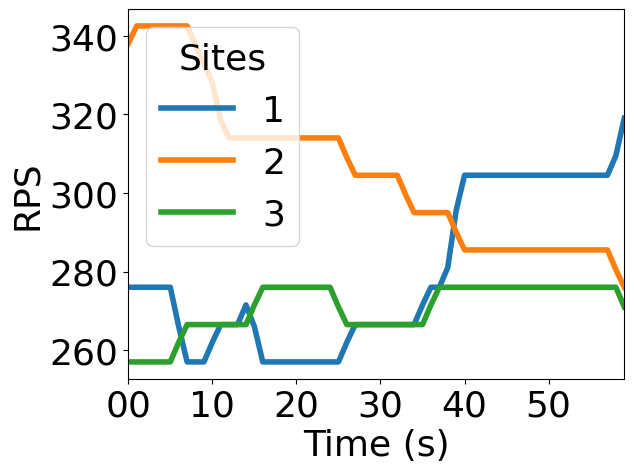

In [871]:


def get_minute_gp(file, minute=30):
    s = np.load(file)
    df = pd.DataFrame()
    df[0] = pd.to_datetime(s.cumsum(), unit='s')
    df = df.set_index(0)
    df[1] = np.ones(len(df))
    df[2] = df[1].rolling('1s').count()

    grouped = df.groupby(pd.Grouper(freq='T'))
    n = minute
    nth_group = grouped.get_group(list(grouped.groups.keys())[n])
    return nth_group


minute=30

gp1 = get_minute_gp('../loadgen/cellular-12n/sfcabs-load-site1.npy',minute)
gp2 = get_minute_gp('../loadgen/cellular-12n/sfcabs-load-site2.npy',minute)
gp3 = get_minute_gp('../loadgen/cellular-12n/sfcabs-load-site3.npy',minute)


fig,ax = plt.subplots()
formatter = DateFormatter('%S')
ax.xaxis.set_major_formatter(formatter)
plt.rcParams.update({'font.size': 26})
plt.rcParams.update({'axes.labelsize': 26})

w = 4

yvals = gp1.groupby(pd.Grouper(freq='S')).mean()[2]
ax.plot(yvals.index, yvals, linewidth=w)

yvals = gp2.groupby(pd.Grouper(freq='S')).mean()[2]
ax.plot(yvals.index, yvals, linewidth=w)

yvals = gp3.groupby(pd.Grouper(freq='S')).mean()[2]
ax.plot(yvals.index, yvals, linewidth=w)
# gp2.groupby(pd.Grouper(freq='S')).mean()[2].plot(ax=ax)
# gp3.groupby(pd.Grouper(freq='S')).mean()[2].plot(ax=ax)

ax.set_ylabel('RPS')
ax.set_xlabel('Time (s)')
ax.legend(range(1,4), title='Sites')
ax.set_xlim((yvals.index[0],yvals.index[-1]))
plt.setp(ax.get_xticklabels(), horizontalalignment='center')


fig.savefig(f'/Users/anirudh/Workspace/fededge/paper/figs/sfloads-m{minute}.pdf', bbox_inches='tight')


In [ ]:
plt.rcParams.keys()

In [ ]:


residential = set([0,4,6,9])
allsites = set(list(range(12)))
urban = allsites - residential

#merge residential
dfl = []
for i in residential:
    file = f'../loadgen/cellular-12n/sfcabs_site{i}.csv'
    df = pd.read_csv(file)
    dfl.append(df)
    
ndf = pd.concat(dfl)
ndf.sort_values(by='start').to_csv('../loadgen/cellular-grouped-9n/sfcabs_siter.csv')


for i in urban:
    file = f'../loadgen/cellular-12n/sfcabs_site{i}.csv'
    os.system(f'cp {file} ../loadgen/cellular-grouped-9n/')


In [ ]:
df = pd.read_csv('../loadgen/cellular-grouped-9n/sfcabs_siter.csv')
ndf = df[((df['start']/60 < m+2) & (df['start']/60 >=m)) | ((df['end']/60 < m+2) & (df['end']/60 >=m))].copy()
ndf['sm']= ndf['start']/60
ndf['em'] = ndf['end']/60
len(ndf)

In [ ]:
df['dur']

In [ ]:
tsum = 0
for i in residential:
    tsum += len(dfs[i])/3
for i in urban:
    print(len(dfs[i])/3)
print(tsum)

In [ ]:
allarr = []
for i in [0, 4, 6, 9]:
    arr = np.load(f'../loadgen/cellular-12n/sfcabs-load-site{i}.npy')
    newarr = arr.cumsum()
    allarr.append(newarr)
    
finalarr = np.concatenate(allarr)
finalarr.sort()
arr2 = np.diff(finalarr)
np.save(arr2, 'res.npy')

In [ ]:
def get_arr(path):
    files = os.listdir(path)
    final_arr = np.array([])
    for file in files:
        if 'lats' not in file:
            continue
        fn = f'{path}{file}'
        try:
            df = pd.read_csv(fn, header=None)
            ndf = df[df[0]>20]
            final_arr = np.hstack((final_arr, ndf[0].values))
        except:
            continue
            
        
    return final_arr

In [ ]:
fig, ax = plt.subplots()
sites = [1, 2, 3, 5, 7, 8, 10, 11, 'r']
# sites = [9]

key='m2-f1-c3'
bp = []
fp = []
arrs = []
for i,sid in enumerate(sites):
    arr = get_arr(f'../feodata/minute_drone_runs/{key}/site{sid}/base/drone_results/')
#     pt_values(arr, ax.flat[i])
#     ax.flat[i].plot(arr)
    arrs.append(arr)
    bp.append(np.percentile(arr, 99))

base = np.hstack(arrs)
pt_values(base, ax)

arrs = []
for i,sid in enumerate(sites):
    arr = get_arr(f'../feodata/drone/aztest/{key}/federated/site{sid}/drone_results/')
#     pt_values(arr, ax.flat[i])
#     ax.flat[i].plot(arr)
    arrs.append(arr)
    fp.append(np.percentile(arr, 99))
fed = np.hstack(arrs)
pt_values(fed, ax)

# arrs = []
# for i in sites:
#     arr = get_arr(f'../feodata/drone/aztest/{key}/hybrid/site{i}/drone_results/')
#     arrs.append(arr)
# hy = np.hstack(arrs)
# pt_values(hy, ax)

# arrs = []
# for i in sites:
#     arr = get_arr(f'../feodata/drone/aztest/{key}/roundrobinlatency/site{i}/drone_results/')
#     arrs.append(arr)
# rt = np.hstack(arrs)
# pt_values(rt, ax)

# arrs = []
# for i in sites:
#     arr = get_arr(f'../feodata/drone/aztest/{key}/epoch/site{i}/drone_results/')
#     arrs.append(arr)
# epoch = np.hstack(arrs)
# pt_values(epoch, ax)




# ax.axhline(0.99, color='black', linestyle=':')
# ax.axhline(0.50, color='black', linestyle=':')
# ax.axvline(100, color='black', linestyle=':')





# ax.grid()

# arrs = []
# for i in sites:
#     arr = get_arr(f'../feodata/drone/lat10/epoch/site{i}/drone_results/')
#     arrs.append(arr)
# epoch = np.hstack(arrs)
# pt_values(epoch, ax)
# ax.set_xlim(0,160)
# ax.set_ylim(0.99,1)
ax.set_xlim(0,250)
# ax.legend([5,'fed-2c-q2-oc5','fed-2c-q2-oc10','fed-2c-q4-oc10','rr-2c-oc10'])
ax.legend(['No Offload','federated','hybrid','rtime','epoch'])

In [915]:
sites = [1, 2, 3, 5, 7, 8, 10, 11, 'r']
# sites = [9]

key='m2-f1-c3'

def get_drone_data(key, pols, pfx=""):
    data = {}
    for p in pols:
        arrs = []
        data[p] = []
#         print(p)
        for i,sid in enumerate(sites):
#             print(sid)
            arr = get_arr(f'../feodata/minute_drone_runs/{pfx}/{key}/site{sid}/{p}/drone_results/')
#             print(len(arr))
            arrs.append(arr)
            data[p].append(np.percentile(arr, 99))
    
    return data

def get_lats(key, pols):
    data = {}
    for p in pols:
        arrs = []
        data[p] = []
#         print(p)
        for i,sid in enumerate(sites):
#             print(sid)
            df = pd.read_csv(f'../feodata/{key}/{p}/clabcl{i}/fiblocal-profile129-p2p20ms.out', header=None)
            df['lats'] = df[0].apply(conv)
#             print(len(arr))
            data[p].append(df['lats'].values)
#             data[p].append(np.percentile(arr[500:], 99.9))
    
    return data


def get_drone_lats(key, pols):
    data = {}
    for p in pols:
        arrs = []
        data[p] = []
#         print(p)
        for i,sid in enumerate(sites):
#             print(sid)
            arr = get_arr(f'../feodata/minute_drone_runs/{key}/site{sid}/{p}/drone_results/')
#             print(len(arr))
            data[p].append(arr)
#             data[p].append(np.percentile(arr[500:], 99.9))
    
    return data

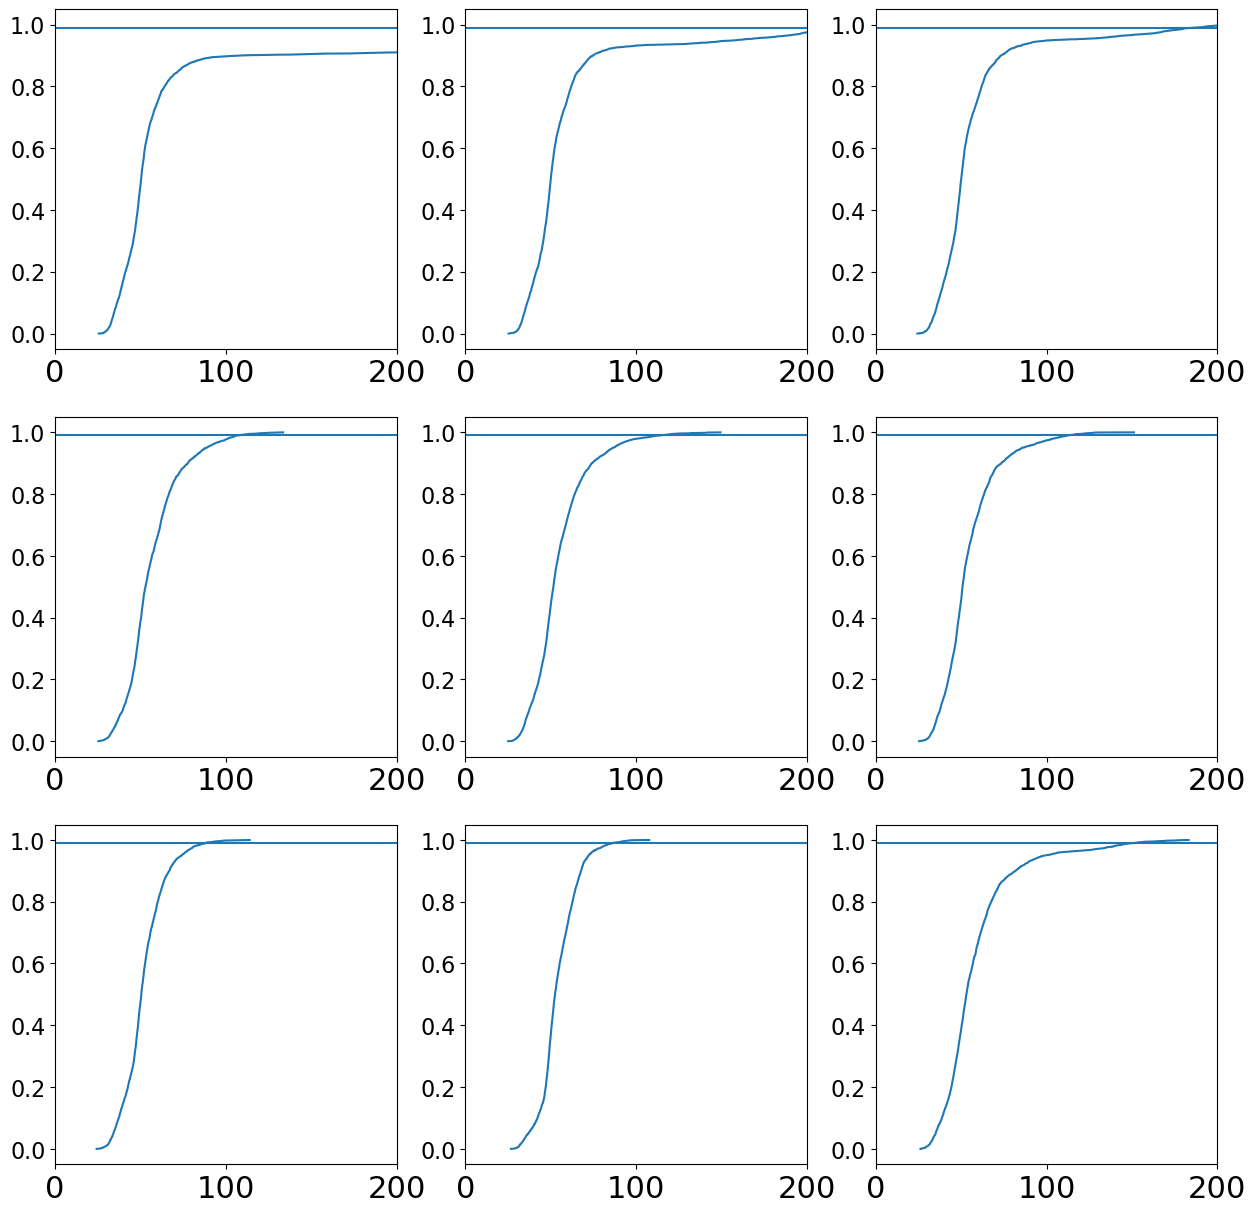

In [999]:
fig, axs = plt.subplots(3,3, figsize=(15,15))
# keys=['m2-f1-c3','m2-f1-c2','m2-f1-c8','m2-f1-c10','m2-f1-c4','m2-f1-c5']
keys=['m2-f1-c2']

pols = ['base','federated','hybrid']#,'rtime']#, 'epoch']
p99 = {}
for key in keys:
    p99[key] = {}
    for i in range(9):
        ax = axs.flat[i]
        data = get_drone_lats(key, pols)
        for pol in pols:
            val = np.percentile(data[pol][i], 99)
            if pol not in p99[key]:
                p99[key][pol] = []
            p99[key][pol].append(val)

        plot_cdf(data['base'][i], ax)
#         plot_cdf(data['federated'][i], ax)
#         plot_cdf(data['hybrid'][i], ax)
#         plot_cdf(data['epoch'][i], ax)
# p99[keys[0]]['base'], p99[keys[1]]['base']
        ax.set_xlim(0,200)
        ax.axhline(0.99)
# p99[keys[0]]['base'], p99[keys[1]]['base'], p99[keys[1]]['federated']

In [1004]:
ba = np.array(p99['m2-f1-c2']['base'])
fa = np.array(p99['m2-f1-c2']['federated'])
fa = np.array(p99['m2-f1-c2']['hybrid'])
ba/fa

array([1.57505332, 1.20417038, 1.17033887, 0.6760434 , 1.58588141,
       0.76964728, 1.24715108, 1.1994669 , 1.91794907])

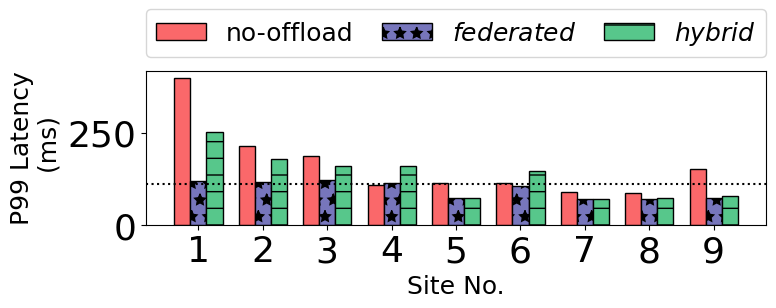

In [938]:
# PLOT FOR DRONE

fig, ax = plt.subplots(figsize=(8,2))
num_sites = 9
xvals = np.arange(0,2*num_sites,2)
key='m2-f1-c2'
w=0.5
for p in pols:
    ax.bar(xvals, p99[key][p], width=w, color=pallete[p], edgecolor='black', hatch=hatches[p])
    xvals = xvals + w
#     ax.set_title(titles[i])
ax.set_ylabel('P99 Latency\n (ms)', fontsize=18)
ax.set_xlabel('Site No.', fontsize=18)
ax.set_xticks(xvals-1)
ax.set_xticklabels(range(1,10))
ax.legend(pollabs, ncol=3, loc=1, bbox_to_anchor=(0.0,1.3,1.0,0.1), fontsize=18, mode='expand', borderaxespad=0.)
ax.axhline(y=110, linestyle='dotted', color='black')

fig.savefig('/Users/anirudh/Workspace/fededge/paper/figs/drone-eval.pdf',bbox_inches='tight')


In [790]:
urban

{1, 2, 3, 5, 7, 8, 10, 11}

In [851]:
# fig, axs = plt.subplots(3,3, figsize=(15,15), sharex=True)
keys = ['mb-2','mb-17t-10c', 'mb-30t-8c','mb-55t-7c']
p99 = {}
pols = ['base','federated','hybrid','epoch']
for key in keys:
    p99[key] = {}
    for i in range(9):
#         ax = axs.flat[i]
        data = get_lats(key, pols)
        for pol in pols:
            val = np.percentile(data[pol][i], 99)
            if pol not in p99[key]:
                p99[key][pol] = []
            p99[key][pol].append(val)

#             plot_cdf(data['base'][i], ax)
#             plot_cdf(data['federated'][i], ax)
#             plot_cdf(data['epoch'][i], ax)
#             plot_cdf(data['hybrid'][i], ax)



    #     ax.legend(['base','federated','epoch','hybrid'])
    #     ax.set_xlim(0,250)




In [980]:
pallete = {
'base'             : '#fa686a',
'roundrobin'       : '#ff8352',
'central'      : '#fecb02',
'hybrid'           : '#57c78b',
'roundrobinlatency': '#71d6ca',
'epoch'            : '#4d9de0',
'federated'        : '#7776bc',
'state-aware'      : '#fec1c9'
}


hatches = {
'base'             :'' ,
'roundrobin'       :'\\',
'central'          :'/' ,
'hybrid'           :'-' ,
'roundrobinlatency':'.' ,
'epoch'            :'x' ,
'federated'        :'*' ,
'state-aware'      :'O' ,
} 

pollabs = [
'no-offload',
'$federated$',
'$hybrid$',
# '$epoch$'
]

# fig, axs = plt.subplots(3,3, figsize=(15,15), sharex=True)
keys = ['mb-2','mb-17t-10c', 'mb-30t-8c','mb-55t-7c']
p99 = {}
pols = ['base','federated','hybrid']#,'epoch']
for key in keys:
    p99[key] = {}
    for i in range(9):
#         ax = axs.flat[i]
        data = get_lats(key, pols)
        for pol in pols:
            val = np.percentile(data[pol][i], 99)
            if pol not in p99[key]:
                p99[key][pol] = []
            p99[key][pol].append(val)

#             plot_cdf(data['base'][i], ax)
#             plot_cdf(data['federated'][i], ax)
#             plot_cdf(data['epoch'][i], ax)
#             plot_cdf(data['hybrid'][i], ax)



    #     ax.legend(['base','federated','epoch','hybrid'])
    #     ax.set_xlim(0,250)




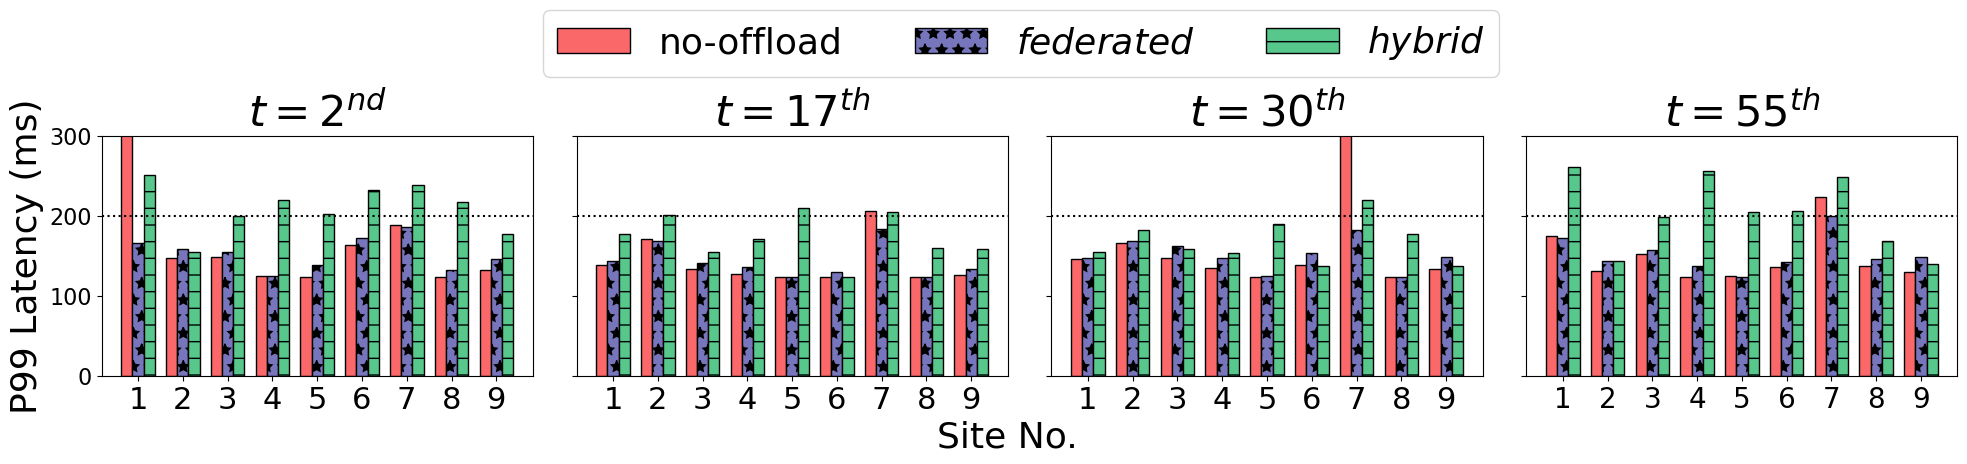

In [998]:
## MAIN PLOT
titles = ['$t = 2^{nd}$', '$t = 17^{th}$', '$t = 30^{th}$', '$t = 55^{th}$']
fig, axs = plt.subplots(1,4, figsize=(20,4), sharex=True, sharey=True)
num_sites=9
legs = []
w=0.5
for i,ax in enumerate(axs.flat):
    xvals = np.arange(0,2*num_sites,2)
    for p in pols:
        l = ax.bar(xvals, p99[keys[i]][p], width=w, color=pallete[p], edgecolor='black', hatch=hatches[p])
        legs.append(l[0])
        xvals = xvals + w
    ax.set_title(titles[i])
    ax.axhline(y=200, linestyle=':', color='black')

ax.set_xticks(xvals-1)
ax.set_xticklabels(range(1,10))
fig.tight_layout()

axs.flat[1].legend(legs, pollabs, ncol=4, loc=2,bbox_to_anchor=(-0.12,1.6))
axs.flat[1].set_ylim(0,300)
axs.flat[0].set_ylabel('P99 Latency (ms)')#, fontsize=18)
xlab = axs.flat[1].set_xlabel('Site No.')#, fontsize=18)
xlab.set_position((1.0,1.0))
ax.tick_params(axis='both', which='major', labelsize=20) 
fig.savefig('/Users/anirudh/Workspace/fededge/paper/figs/mb-1.pdf',bbox_inches='tight')
    

In [ ]:
df = pd.read_csv(f'../feodata/mb-30t-8c/base/clabcl6/fiblocal-profile129-p2p20ms.out', header=None)
df[0].apply(conv)

In [987]:
ba = np.array(p99['mb-2']['base'])
fa = np.array(p99['mb-2']['federated'])
ba/fa

array([2.07768212, 0.92573768, 0.96094032, 0.99797833, 0.88712027,
       0.95078029, 1.01492838, 0.93735802, 0.90891746])

<Axes: >

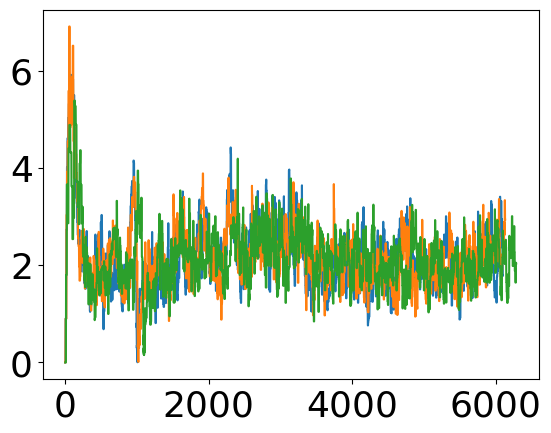

In [942]:
fig, ax = plt.subplots()
df10[6].plot(ax=ax)
# dfr[6].plot(ax=ax)
ff10[6].plot(ax=ax)
# ffr[6].plot(ax=ax)
ff10q3[6].plot(ax=ax)
# ffrq3[6].plot(ax=ax)

In [944]:

data = {}
for k in keys:
    data[k] = {}
    for p in pols:
        statsf = f'../feodata/{k}_{p}_stats.out'
        rejectf = f'../feodata/{k}_{p}_rejects.out'
        df = pd.read_csv(statsf, header=None)
        df[3] = df[1].apply(lambda x : int(x.split('=')[1]))
        df[2] = df[2].apply(int)
        rf = pd.read_csv(rejectf, header=None)
        rf[0] = rf[0].apply(int)
        data[k][p] = (df[3].sum(), df[2].sum(), rf[0].sum())        
#         break
#     break

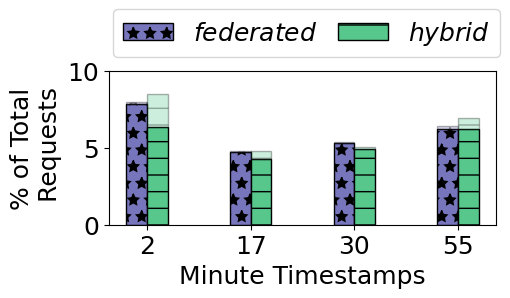

In [979]:
import matplotlib.patches as mpatches

gp_by_pol = {}
for k in keys:
    for p in pols[1:]:
        if p not in gp_by_pol:
            gp_by_pol[p] = []
        tup = data[k][p]
        offloads = 100*tup[1]/tup[0]
        rejects = 100*tup[2]/tup[0]
        gp_by_pol[p].append((offloads, rejects))


fig,ax = plt.subplots(figsize=(5,2))
xvals = np.arange(0,8,2)
w=0.4
legs = []
for p in pols[1:]:
    arr = np.array(gp_by_pol[p])
    l = ax.bar(xvals, arr[:,0], width=w, color=pallete[p], hatch=hatches[p], edgecolor='black')
    legs.append(l[0])
    ax.bar(xvals, arr[:,1], bottom=arr[:,0], width=w, color=pallete[p], hatch=hatches[p], alpha=0.3, edgecolor='black')
    xvals = xvals + 0.4
    
    
xlabs = [2, 17, 30 ,55]
ax.set_xticks(xvals-0.6)
ax.set_xticklabels(xlabs)
ax.set_ylim(0,10)
ax.set_ylabel('% of Total\n Requests', fontsize=18)
ax.set_xlabel('Minute Timestamps' , fontsize=18)

# leg1 = ax.legend(legs, pollabs[1:], loc=1, ncol=3, bbox_to_anchor=(1.05,1.5))

# offload_patch = mpatches.Patch(color='black', label='Offload Requests')  # Create a custom white patch
# reject_patch = mpatches.Patch(color='darkgray', alpha=0.5, label='Rejected Offloads')  # Create a custom white patch

# leg2 = ax.legend(handles=[offload_patch, reject_patch], loc='upper left', bbox_to_anchor=(0.5, 1))
# ax.add_artist(leg1)
ax.tick_params(axis='both', which='major', labelsize=18) 



ax.legend(legs, pollabs[1:], ncol=2, fontsize=18, bbox_to_anchor=(0.01,0.4, 1, 1), loc=1, mode='expand', borderaxespad=0.)
fig.savefig('/Users/anirudh/Workspace/fededge/paper/figs/mb-2.pdf',bbox_inches='tight')


In [819]:
dff = pd.read_csv('../feodata/minute_drone_runs/m2-f1-c2/site11/federated/qlen.out', header=None, sep=' ')
dfb = pd.read_csv('../feodata/minute_drone_runs/m2-f1-c2/site11/base/qlen.out', header=None, sep=' ')

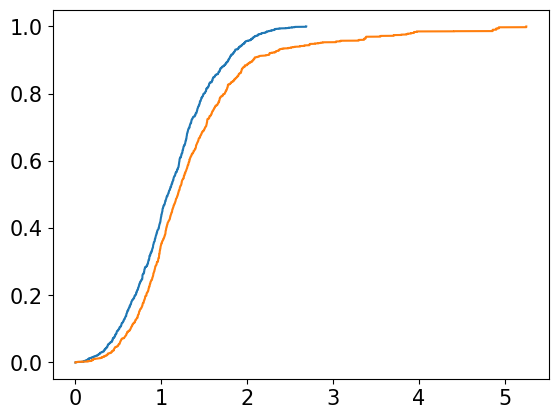

In [820]:
fig,ax = plt.subplots()
plot_cdf(dfb[6],ax)
plot_cdf(dff[6],ax)